# This is the beginner notebook, for my neural network project

## Credit Risk Modeling : practice

I will be working to practice using machine learning protocols, and apply them to real-world data to display the power of machine learning. I will be using the Lending Club dataset, which is a dataset of loans that were given out by the Lending Club. The goal is to predict whether or not a loan will be paid off in full or not. This is a classification problem, and I will be using a neural network to solve it.

## Source : https://www.kaggle.com/datasets/laotse/credit-risk-dataset

## Step 1: Load and Preprocess Data

In [204]:
{
    "python.analysis.extraPaths": [
        "./venv/lib/python3.x/site-packages"
    ]
}

{'python.analysis.extraPaths': ['./venv/lib/python3.x/site-packages']}

In [205]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
#import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# Read the CSVs into DataFrames
train_df = pd.read_csv(Path('Resources/credit_risk_dataset.csv'))

# display the first 5 rows of train_df
display(train_df.head())

display(list(train_df.dtypes[train_df.dtypes == "object"].index))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [206]:
# Create a list of the columns with categorical variables
categorical_variables = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

In [207]:
enc = OneHotEncoder(sparse=False)

# Let us now use the fit_transform() method to encode the categorical variables 
# that we saved earlier, and then convert the encoded data into a DataFrame.
encoded_data = enc.fit_transform(train_df[categorical_variables])

# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
    )

# Display sample data
encoded_df.head()
print("We did it! We have not only turned the non-numeric data into numeric data, but we have also created features for each categorical variable.")

We did it! We have not only turned the non-numeric data into numeric data, but we have also created features for each categorical variable.


/Users/najibabounasr/opt/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [208]:
# display the new DataFrame
display(encoded_df.head())

# use the encoded_df DataFrame to replace the categorical variables in the train_df DataFrame
train_df = train_df.merge(encoded_df,left_index=True,right_index=True).drop(categorical_variables,axis=1)
display(train_df.head())

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0,0.10,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,3,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [209]:
#isolate the non-catetgorical variables
non_categorical_variables = list(train_df.dtypes[train_df.dtypes != "object"].index)

#display the non-categorical variables as a dataframe
display(train_df[non_categorical_variables])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0,0.10,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,3,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [210]:
# Search for NaN values in the dataframe
display(train_df.isnull().sum())

person_age                           0
person_income                        0
person_emp_length                  895
loan_amnt                            0
loan_int_rate                     3116
loan_status                          0
loan_percent_income                  0
cb_person_cred_hist_length           0
person_home_ownership_MORTGAGE       0
person_home_ownership_OTHER          0
person_home_ownership_OWN            0
person_home_ownership_RENT           0
loan_intent_DEBTCONSOLIDATION        0
loan_intent_EDUCATION                0
loan_intent_HOMEIMPROVEMENT          0
loan_intent_MEDICAL                  0
loan_intent_PERSONAL                 0
loan_intent_VENTURE                  0
loan_grade_A                         0
loan_grade_B                         0
loan_grade_C                         0
loan_grade_D                         0
loan_grade_E                         0
loan_grade_F                         0
loan_grade_G                         0
cb_person_default_on_file

count    29465.000000
mean        11.011695
std          3.240459
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

count    31686.000000
mean         4.789686
std          4.142630
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

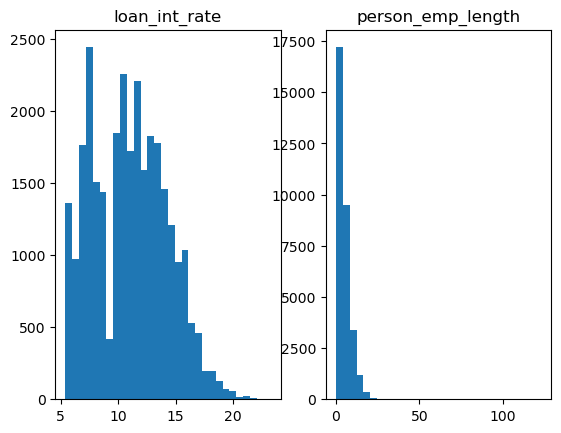

In [211]:
# We need to understand the distribution of the data in each column with nan values
display(train_df['loan_int_rate'].describe())
display(train_df['person_emp_length'].describe())
# Graph the two columns with nan values
fig, ax = plt.subplots(1,2)
ax[0].hist(train_df['loan_int_rate'].dropna(), bins=30)
ax[0].set_title('loan_int_rate')
ax[1].hist(train_df['person_emp_length'].dropna(), bins=30)
ax[1].set_title('person_emp_length')
plt.show()

## Removing NaN values: 

### It is critical that we remove NaN vaues, and as we are working with credit default risk-- a critical area of finance-- we will be holistically evaluating the data. We will start with ensuring that NaN values are not simply removed, but are replaced with either the mean of the column, or with new values based on predictive imputation. *We will be using the latter, as it is more accurate.*

In [212]:
# Data with known loan_int_rate
reg_train_data = train_df.dropna(subset=['loan_int_rate'])

# Data with missing loan_int_rate
predict_data = train_df[train_df['loan_int_rate'].isnull()]

In [213]:
# check for missing values in the new dataframe
display(reg_train_data.isnull().sum())
display(reg_train_data.describe())

person_age                          0
person_income                       0
person_emp_length                 827
loan_amnt                           0
loan_int_rate                       0
loan_status                         0
loan_percent_income                 0
cb_person_cred_hist_length          0
person_home_ownership_MORTGAGE      0
person_home_ownership_OTHER         0
person_home_ownership_OWN           0
person_home_ownership_RENT          0
loan_intent_DEBTCONSOLIDATION       0
loan_intent_EDUCATION               0
loan_intent_HOMEIMPROVEMENT         0
loan_intent_MEDICAL                 0
loan_intent_PERSONAL                0
loan_intent_VENTURE                 0
loan_grade_A                        0
loan_grade_B                        0
loan_grade_C                        0
loan_grade_D                        0
loan_grade_E                        0
loan_grade_F                        0
loan_grade_G                        0
cb_person_default_on_file_N         0
cb_person_de

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,29465.000000,2.946500e+04,28638.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,...,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000
mean,27.714712,6.602047e+04,4.788672,9584.744612,11.011695,0.219379,0.170110,5.788257,0.411403,0.003190,...,0.174885,0.331716,0.318853,0.197794,0.112472,0.029900,0.007263,0.002002,0.823078,0.176922
std,6.300193,6.190142e+04,4.154627,6316.272282,3.240459,0.413833,0.106879,4.031987,0.492096,0.056393,...,0.379876,0.470837,0.466040,0.398343,0.315952,0.170314,0.084914,0.044704,0.381609,0.381609
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,7.910000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### We have to do another round of perprocessing, as NAN values are not going away. We will be using a predictive imputer to replace the NaN values with values that are predicted by the model. This is a more accurate way of replacing NaN values, as it is based on the data itself, and not just the mean of the column.

In [214]:
# Data where 'person_emp_length' is NOT missing (to train the model)
train_data_for_emp_length = reg_train_data.dropna(subset=['person_emp_length'])

# Data where 'person_emp_length' IS missing (to predict 'person_emp_length')
predict_data_for_emp_length = reg_train_data[reg_train_data['person_emp_length'].isnull()]

In [215]:
display(train_data_for_emp_length.describe())
display(predict_data_for_emp_length.describe())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,...,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736,0.412075,0.003282,...,0.174628,0.328305,0.319540,0.199001,0.113416,0.030379,0.007298,0.002060,0.821810,0.178190
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483,0.492217,0.057199,...,0.379655,0.469605,0.466307,0.399256,0.317106,0.171631,0.085117,0.045343,0.382679,0.382679
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,827.000000,827.000000,0.0,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.0,...,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.0,827.000000,827.000000
mean,27.281741,44242.383313,NaN,7100.181378,10.036143,0.315599,0.191644,5.598549,0.388150,0.0,...,0.183797,0.449819,0.295042,0.155985,0.079807,0.013301,0.006046,0.0,0.866989,0.133011
std,5.921741,37250.866484,NaN,5263.533372,3.466981,0.465035,0.120651,3.797654,0.487624,0.0,...,0.387553,0.497777,0.456338,0.363061,0.271157,0.114630,0.077567,0.0,0.339792,0.339792
min,21.000000,4200.000000,NaN,1000.000000,5.420000,0.000000,0.010000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,23.000000,24000.000000,NaN,3200.000000,6.990000,0.000000,0.095000,3.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,25.000000,36000.000000,NaN,6000.000000,9.910000,0.000000,0.170000,4.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,30.000000,55500.000000,NaN,9775.000000,12.690000,1.000000,0.265000,8.000000,1.000000,0.0,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,70.000000,648000.000000,NaN,35000.000000,21.360000,1.000000,0.650000,27.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [216]:
features = [col for col in train_data_for_emp_length.columns if col not in ('person_emp_length','loan_int_rate')]

# Preparing feature matrices

# Create X matrix
X_train_emp = train_data_for_emp_length[features]
y_train_emp = train_data_for_emp_length['person_emp_length']
X_predict_emp = predict_data_for_emp_length[features]

In [217]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
regressor_emp = RandomForestRegressor(random_state=42)

# Train the model
regressor_emp.fit(X_train_emp, y_train_emp)

RandomForestRegressor(random_state=42)

In [218]:
# Predict 'person_emp_length' for the data with missing values
predicted_emp_lengths = regressor_emp.predict(X_predict_emp)

# Fill in the missing 'person_emp_length' values in the original DataFrame
reg_train_data.loc[reg_train_data['person_emp_length'].isnull(), 'person_emp_length'] = predicted_emp_lengths

In [219]:
grand_total = reg_train_data['person_emp_length'].isnull().sum()
display(print(f"After our Imputation using the Regrissive model, we have now stand with a grand total of: {grand_total} missing values in the person_emp_length column."))

# Data with known loan_int_rate
display((reg_train_data))


After our Imputation using the Regrissive model, we have now stand with a grand total of: 0 missing values in the person_emp_length column.


None

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0,0.10,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,3,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Comparison with earlier data: looking for differences and similarities

### It will be quite clear, that the logistic regression technique had succesfully ridden us of the cumersome and spurious NaN values, while also maintaining the overall shape of the data. Any significant changes in median and mean would have been a cause for concern, but as we can see, the data is still quite similar to the original data.

In [220]:
# We compare train_df with reg_train_data
nan_counts_before = train_df['person_emp_length'].isnull().sum()
nan_counts_after = reg_train_data['person_emp_length'].isnull().sum()

print(f"NaN Counts Before: {nan_counts_before}")
print(f"NaN Counts After: {nan_counts_after}")

NaN Counts Before: 895
NaN Counts After: 0


In [221]:
# We want to check the means and medians of the two datsets, to see if there is a 
# significant difference in the two datasets
mean_before = train_df['person_emp_length'].mean()
median_before = train_df['person_emp_length'].median()

mean_after = reg_train_data['person_emp_length'].mean()
median_after = reg_train_data['person_emp_length'].median()

print(f"Mean Before: {mean_before}, After: {mean_after}")
print(f"Median Before: {median_before}, After: {median_after}")

Mean Before: 4.789686296787225, After: 4.7781608247880865
Median Before: 4.0, After: 4.0


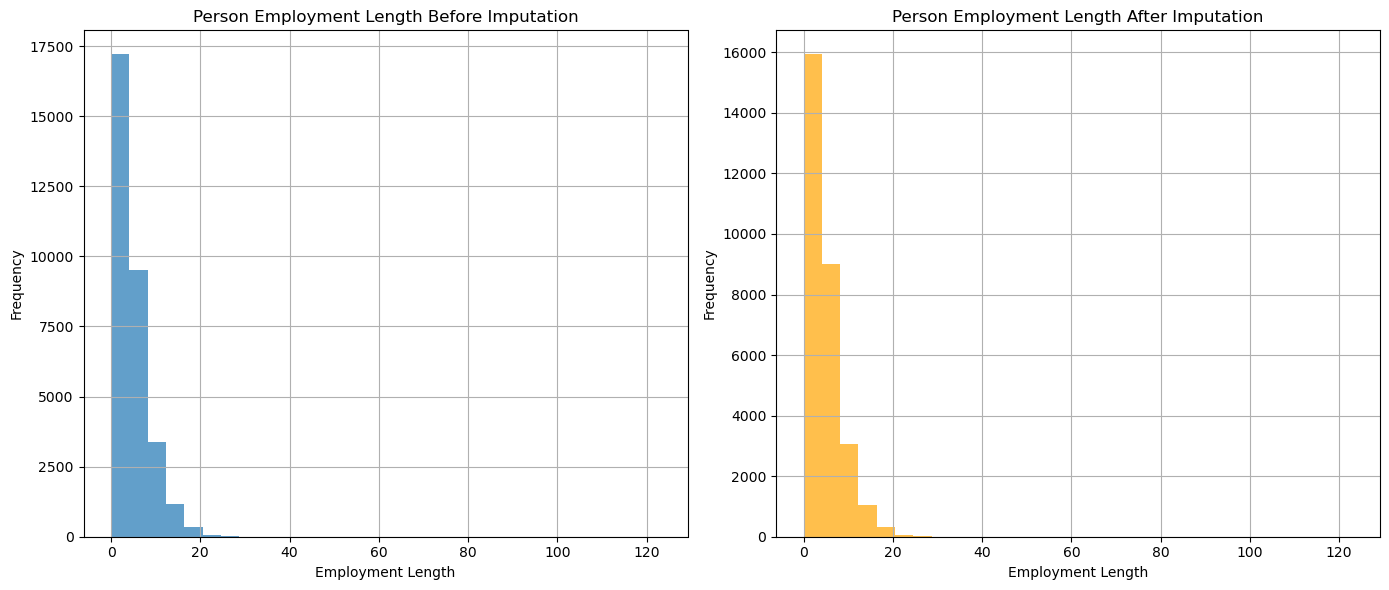

Almost identitical, we can see that the data preprocessing has ben a success!


In [222]:
plt.figure(figsize=(14, 6))

# Histogram for 'person_emp_length' before imputation
plt.subplot(1, 2, 1)
train_df['person_emp_length'].hist(bins=30, alpha=0.7)
plt.title('Person Employment Length Before Imputation')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')

# Histogram for 'person_emp_length' after imputation
plt.subplot(1, 2, 2)
reg_train_data['person_emp_length'].hist(bins=30, alpha=0.7, color='orange')
plt.title('Person Employment Length After Imputation')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Almost identitical, we can see that the data preprocessing has ben a success!")

In [223]:
# We replace the old data, with the new data 
train_df = reg_train_data

# Continuing along-- after cleaning and clearing up the data

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>],
       [<Axes: title={'center': 'loan_status'}>,
        <Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'person_home_ownership_MORTGAGE'}>,
        <Axes: title={'center': 'person_home_ownership_OTHER'}>],
       [<Axes: title={'center': 'person_home_ownership_OWN'}>,
        <Axes: title={'center': 'person_home_ownership_RENT'}>,
        <Axes: title={'center': 'loan_intent_DEBTCONSOLIDATION'}>,
        <Axes: title={'center': 'loan_intent_EDUCATION'}>,
        <Axes: title={'center': 'loan_intent_HOMEIMPROVEMENT'}>],
       [<Axes: title={'center': 'loan_intent_MEDICAL'}>,
        <Axes: title={'center': 'loan_intent_PERSONAL'}>,
        <

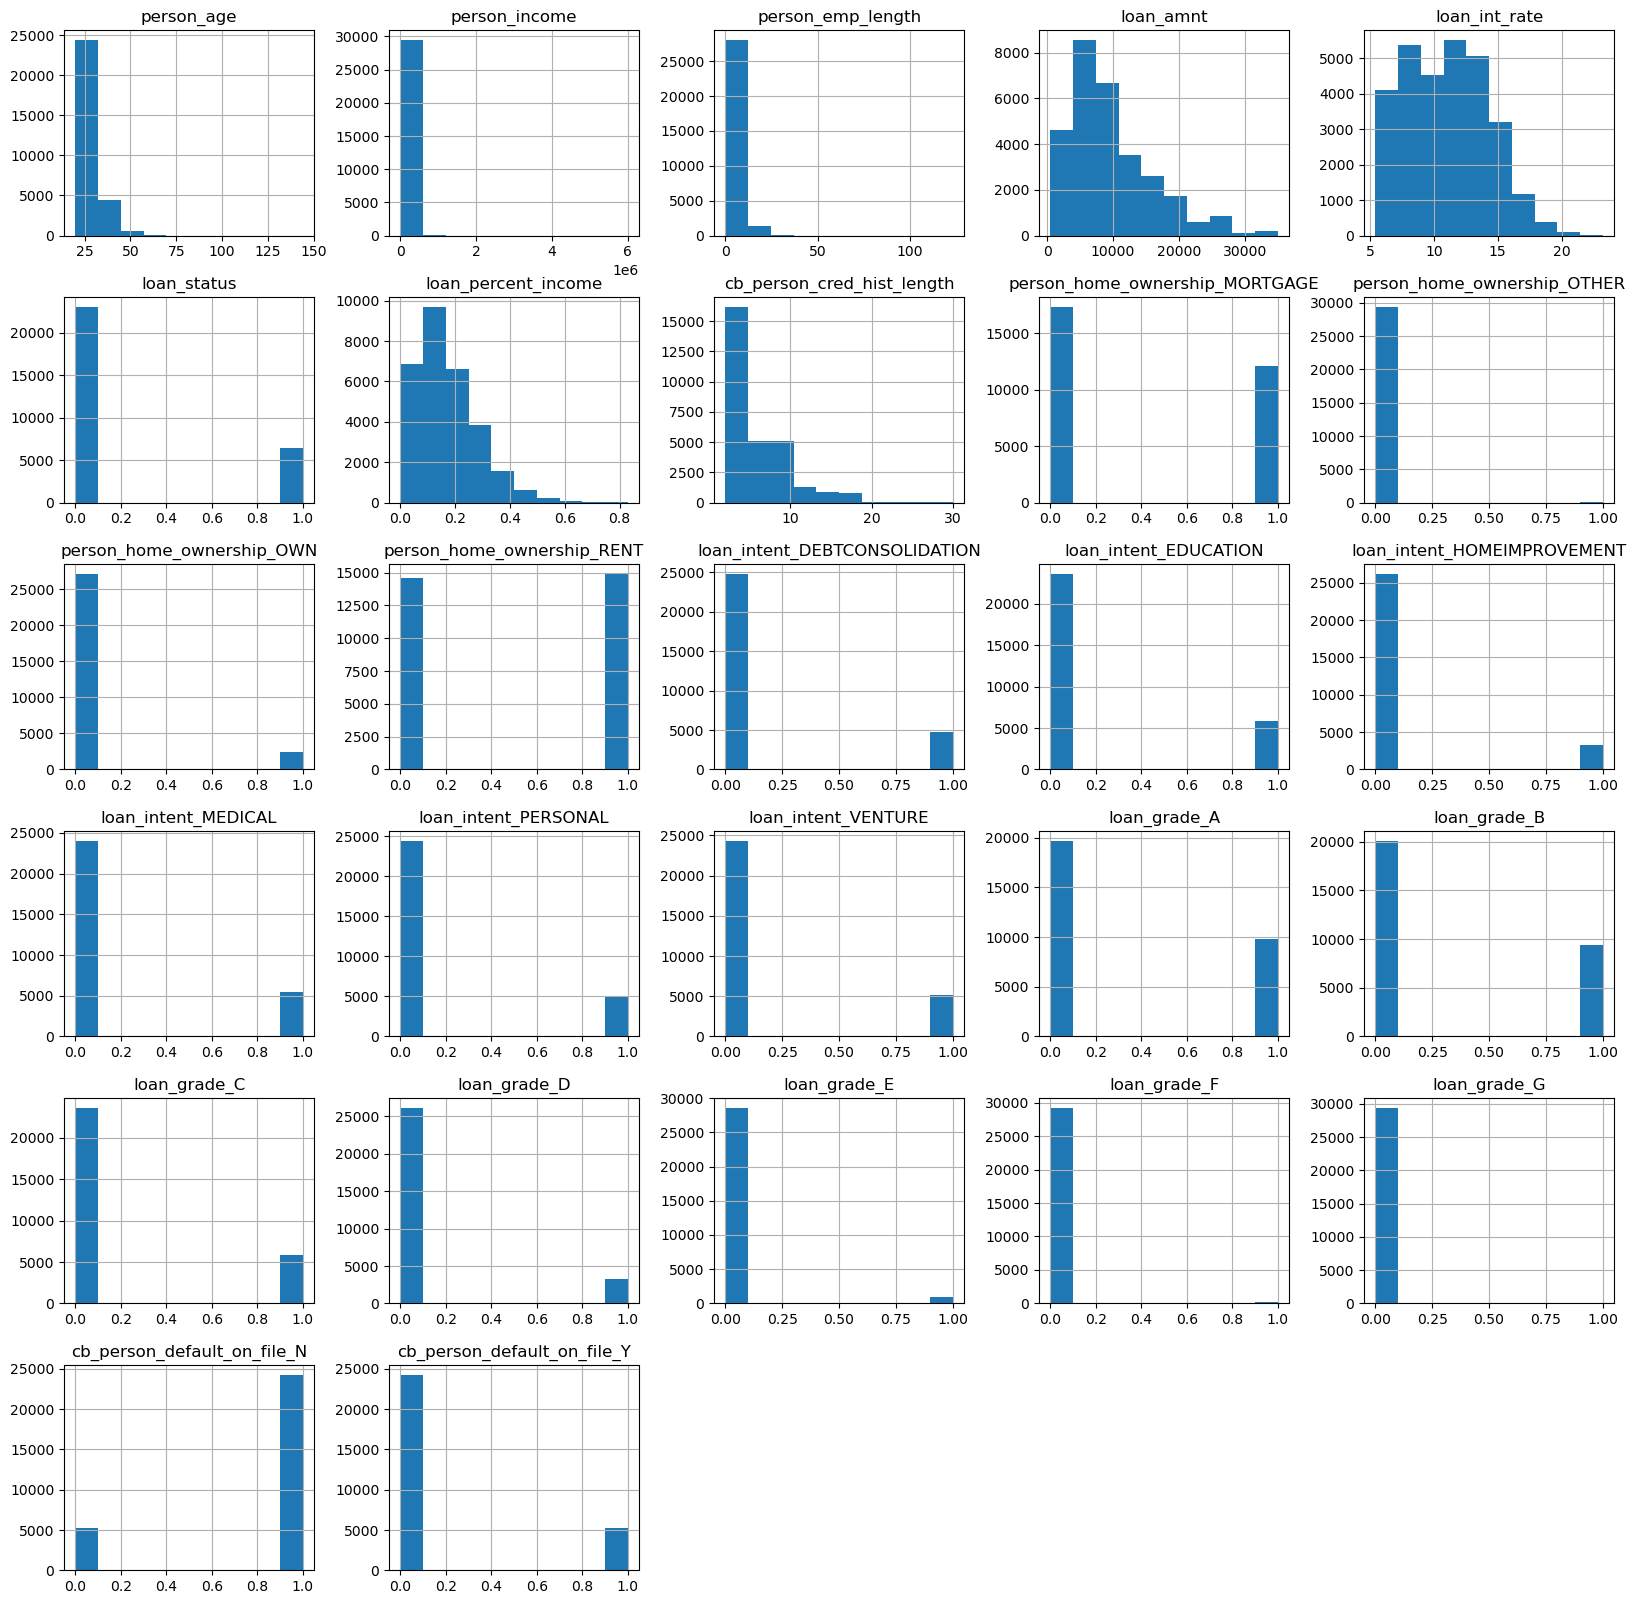

In [224]:
import panel as pn

# Visualize the data

# Create Distribution Plots for each column

train_df.hist(figsize=(20, 20))




In [225]:
# Lets get rid of the columns that have values greater than 10, as these were originally non-numeric data, 
# which we might not get that much information from.

dist_plot_df = train_df.drop(columns=['person_age', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']) 

array([[<Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_length'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_status'}>,
        <Axes: title={'center': 'person_home_ownership_MORTGAGE'}>],
       [<Axes: title={'center': 'person_home_ownership_OTHER'}>,
        <Axes: title={'center': 'person_home_ownership_OWN'}>,
        <Axes: title={'center': 'person_home_ownership_RENT'}>,
        <Axes: title={'center': 'loan_intent_DEBTCONSOLIDATION'}>,
        <Axes: title={'center': 'loan_intent_EDUCATION'}>],
       [<Axes: title={'center': 'loan_intent_HOMEIMPROVEMENT'}>,
        <Axes: title={'center': 'loan_intent_MEDICAL'}>,
        <Axes: title={'center': 'loan_intent_PERSONAL'}>,
        <Axes: title={'center': 'loan_intent_VENTURE'}>,
        <Axes: title={'center': 'loan_grade_A'}>],
       [<Axes: title={'center': 'loan_grade_B'}>,
        <Axes: title={'center': 'loan_grade_C'}>,
        <Axes: title={

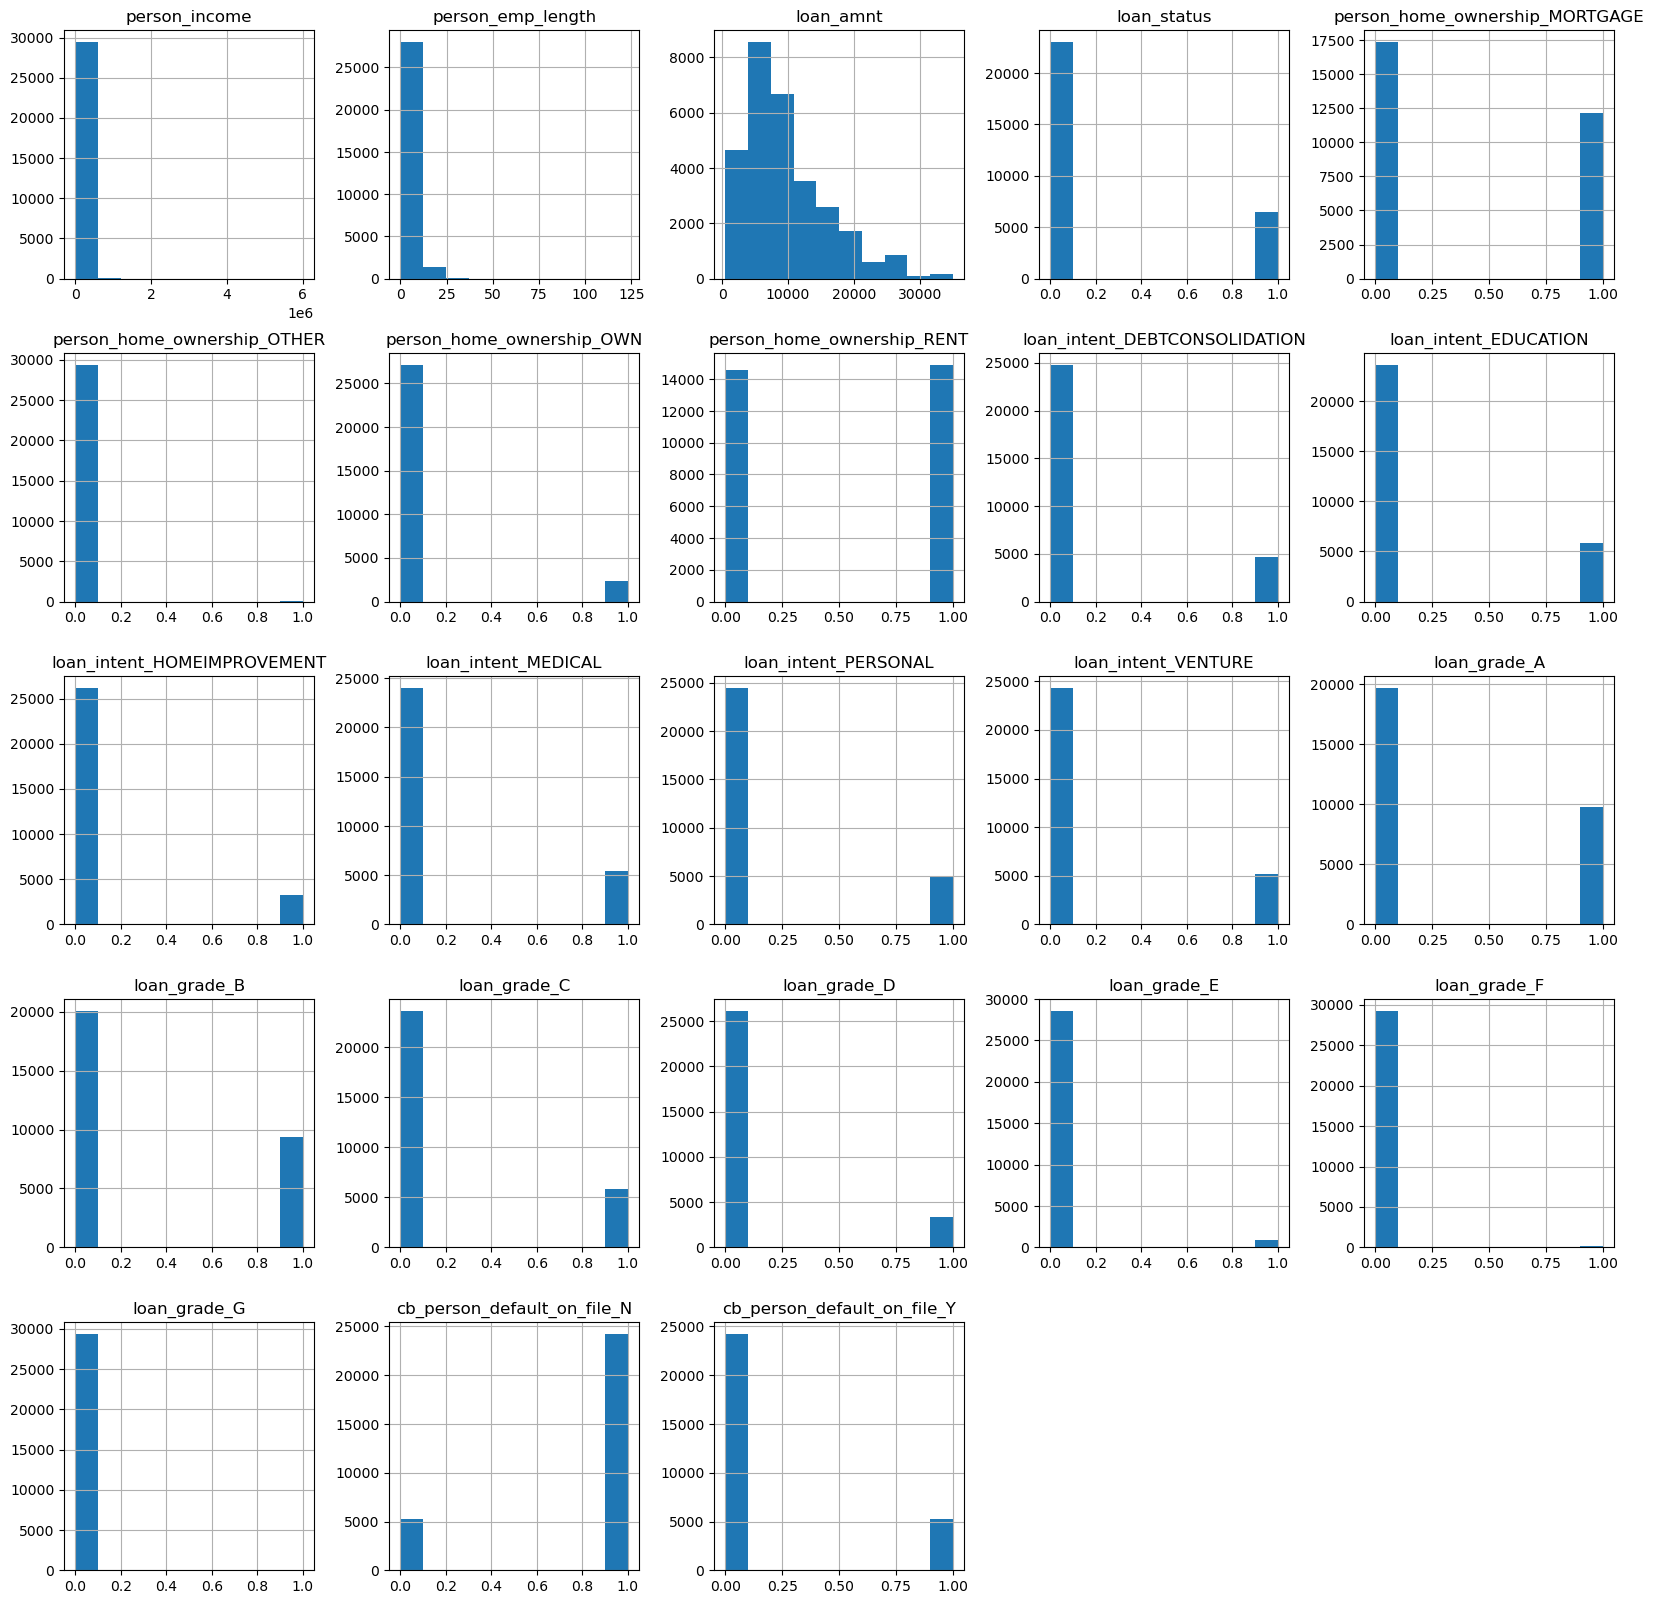

In [226]:
# Now we can create the distribution plots for each column

dist_plot_df.hist(figsize=(20, 20))


# SECOND SECTION : Creating a neural network

## Feature Engineering

#### Important: remember to set random state to 1 for reproducibility

#### Also, I did not know until now that the OneHotEncoder() function is meant to be performed before the train_test_split() function. I will be doing this from now on. New insights are gained everyday. 

In [227]:
# Step 2
# Create the features (X) and target (y) sets
X = train_df.drop(columns=["loan_status"]).values
y = train_df["loan_status"].values

# Create the training and testing datasets
# We will set random_state=1 to make sure we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create the scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [228]:
# Assuming X_train_scaled is your NumPy array
nan_count = np.isnan(X_train_scaled).sum()
print(nan_count)

0


## Creating a Neural Network Model using Keras 

I wasn't sure which NN we will be working with. This was the only model I had learned about, and had the most experience with. I will be using the Keras library to create a neural network model. 

I had watched the introductory video explaining the ReLU functions, and the sigmoid functions. The information has widened my perspective on the neural network model, and will I definitely try and apply the learning from the video in this micro-project.

# *There has ben an issue in development, related to the tensorflow installment.*

- *I am not sure why tensorflow no longer works with my Mac-- if this issue will come in the way of my learning, I will definetely be ready to take steps to resolve any depoendency conflicts. For now, though, I will just use a workaround I have found online. I was taught to use sequential and build the neural network that way, but I will now use sklearn's MLPCLassifier instead*

- I will be using ReLU, now understanding that it's steep activation, or 'firing' similar to neurons (as caught in brain EEG scans) is what makes it both powerful and similar in nature to human neuronal firing and excitation. 

In [229]:
# Step 1: We use sklearn to create a sequential model

from sklearn.neural_network import MLPClassifier

# Example: Creating a model with two hidden layers, the first with 10 neurons and the second with 5 neurons
model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, activation='relu', solver='adam', random_state=1)

# Step 2: Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Step 3: Evaluate the model using the test data
# Assuming X_test and y_test are your features and labels for testing
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")


Accuracy: 0.777657119587349


# Perfecting the Model:

### We have achieved an unsatisfactory score of 0.7777, which is not good enough.Thankfully, we understand that the weights, number of layers and biases of the neurons must be adjusted to achieve a better score.